<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Hypothesis_testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all the libraries that we use in this dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency


# Cutlets

import the dataset

In [ ]:
df=pd.read_csv('Cutlets.csv')
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
df.mean()

Unit A    7.019091
Unit B    6.964297
dtype: float64

In [ ]:
df.var()

Unit A    0.083179
Unit B    0.117924
dtype: float64

In [ ]:
stats.t.cdf(0.95,df=34)

0.8255916386536518

In [ ]:
df.duplicated().sum()

0

Ploting the data for visualization

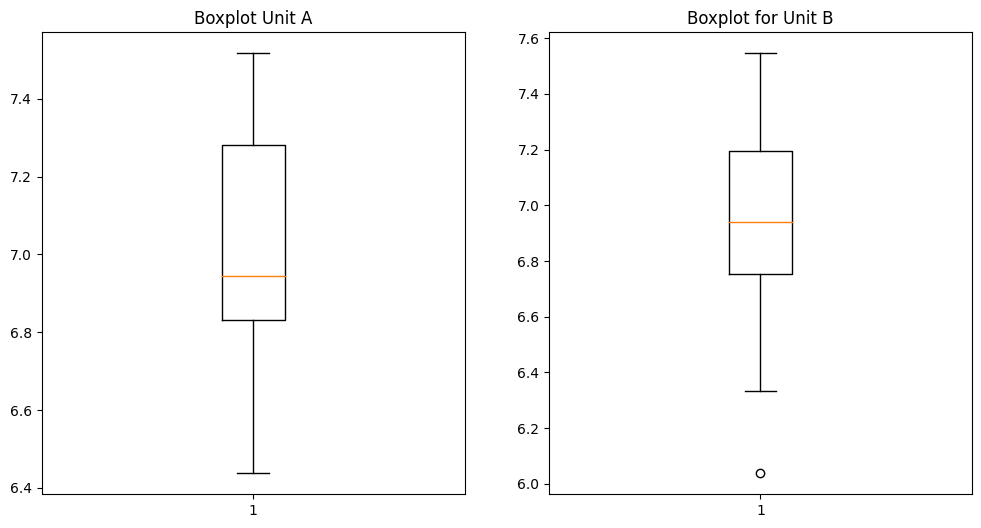

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df['Unit A'])
plt.title('Boxplot Unit A')
plt.subplot(1,2,2)
plt.boxplot(df['Unit B'])
plt.title('Boxplot for Unit B')
plt.show()

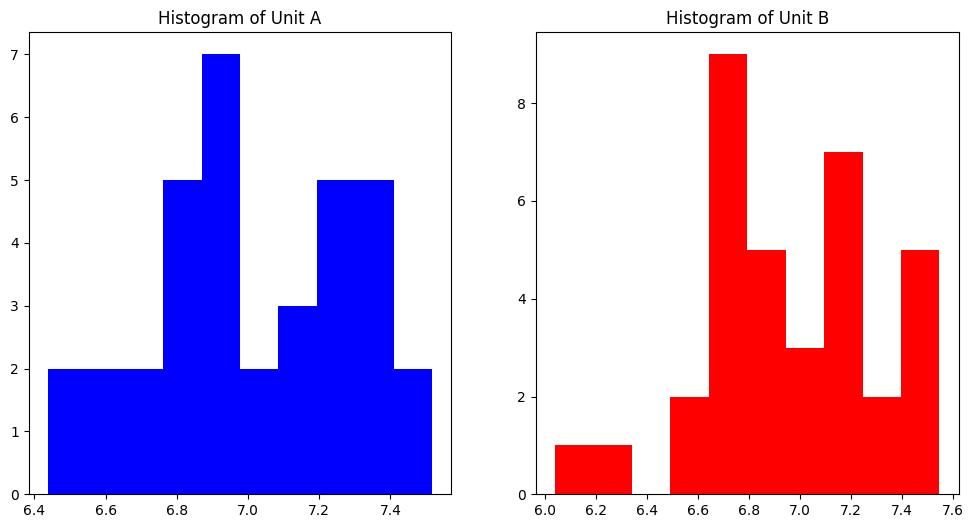

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['Unit A'], color='blue')
plt.title('Histogram of Unit A')
plt.subplot(1,2,2)
plt.hist(df['Unit B'], color='red')
plt.title('Histogram of Unit B')
plt.show()

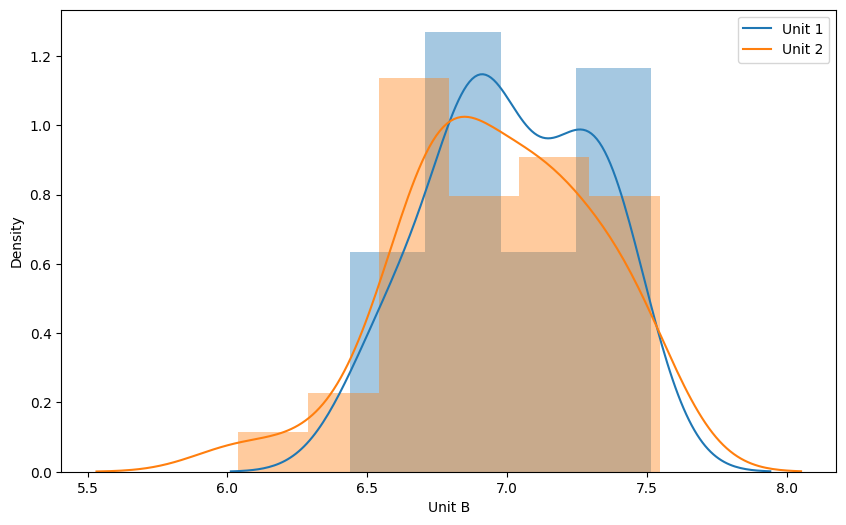

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['Unit A'])
sns.distplot(df['Unit B'])
labels= ['Unit 1',  "Unit 2"]
plt.legend(labels)

Compare evidence with hypothesis testing

t-statistics

In [ ]:
df.corr()

,Unit A,Unit B
Unit A,1.00000,0.08131
Unit B,0.08131,1.00000


In [ ]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(df['Unit A'], df['Unit B'])
print('p_value=', p_value)


p_value= 0.4722394724599501


In [ ]:
s = 0.05
if p_value <= s :
  print('we accept the alternative hypothesis')
else:
  print('we accept the null hypothesis')

we accept the null hypothesis


## Hence, there is no significanct diffirence between the two samples.

# LabTAT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [ ]:
df2=pd.read_csv('LabTAT.csv')
df2

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
df2.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
df2.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
df2[df2.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [ ]:
df2.shape

(120, 4)

ploting for deta distribution

<Axes: ylabel='Laboratory 1'>

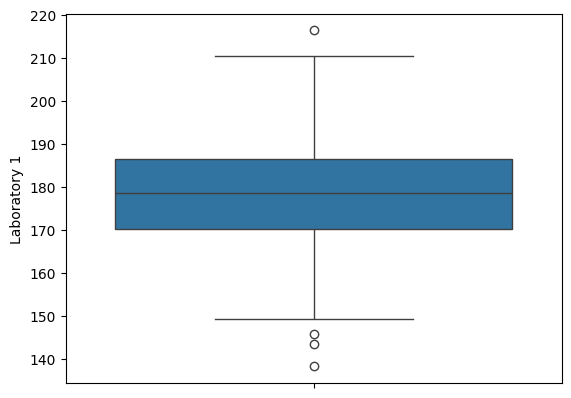

In [ ]:
sns.boxplot(df2['Laboratory 1'])

<Axes: ylabel='Laboratory 2'>

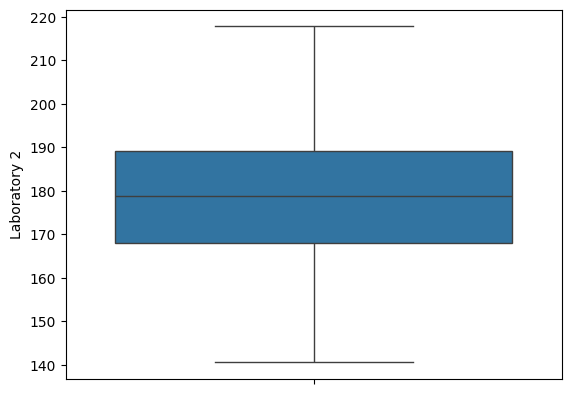

In [ ]:
sns.boxplot(df2['Laboratory 2'])

<Axes: ylabel='Laboratory 3'>

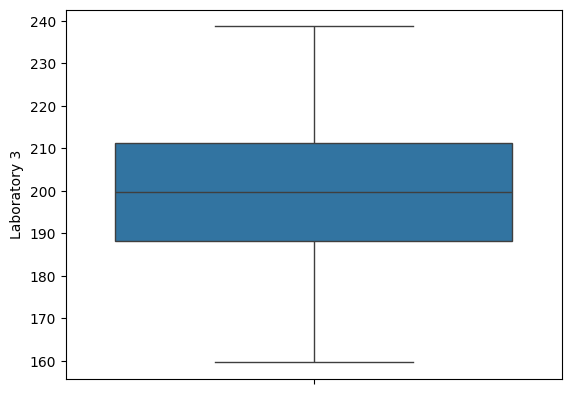

In [ ]:
sns.boxplot(df2['Laboratory 3'])

<Axes: ylabel='Laboratory 4'>

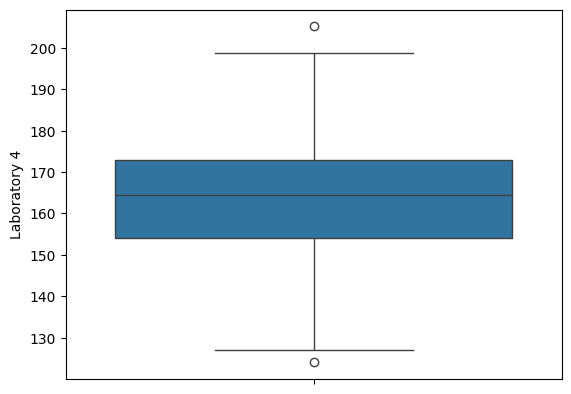

In [ ]:
sns.boxplot(df2['Laboratory 4'])

Text(0.5, 1.0, 'laboratory 4')

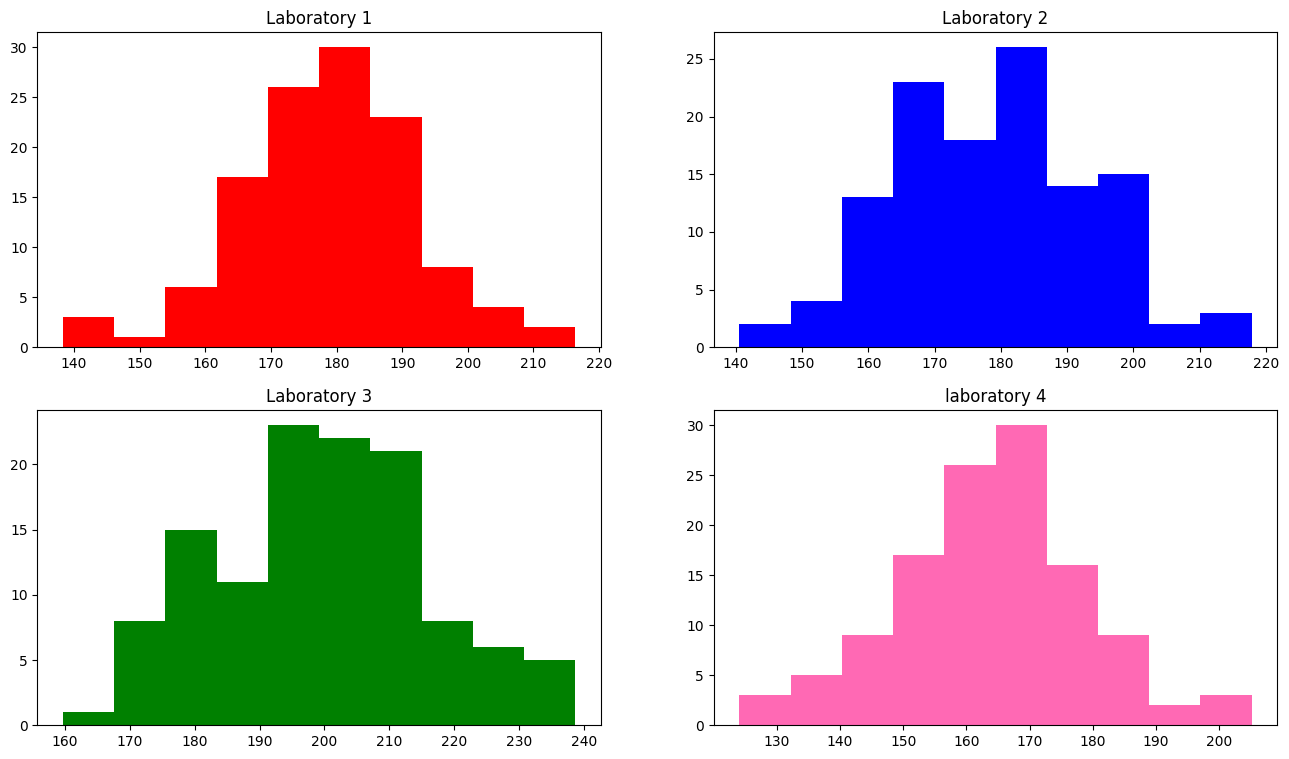

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.hist(df2['Laboratory 1'],color='red')
plt.title('Laboratory 1')
plt.subplot(2,2,2)
plt.hist(df2['Laboratory 2'],color='blue')
plt.title('Laboratory 2')
plt.subplot(2,2,3)
plt.hist(df2['Laboratory 3'],color='green')
plt.title('Laboratory 3')
plt.subplot(2,2,4)
plt.hist(df2['Laboratory 4'],color='hotpink')
plt.title('laboratory 4')

<Axes: xlabel='Laboratory 1', ylabel='Density'>

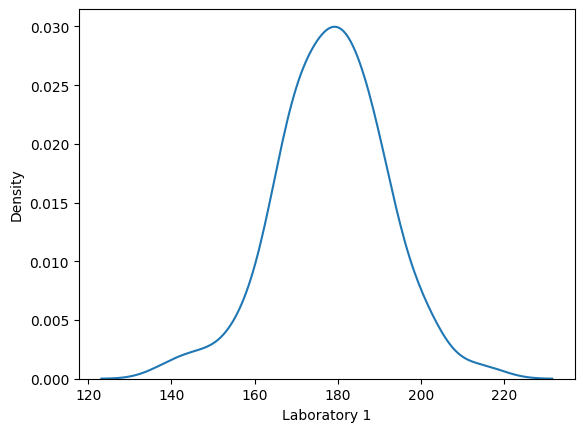

In [ ]:
sns.distplot(df2['Laboratory 1'], kde=True, hist= False)

<Axes: xlabel='Laboratory 2', ylabel='Density'>

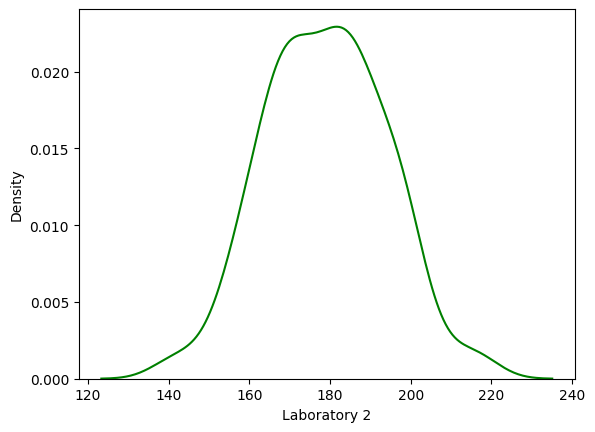

In [ ]:
sns.distplot(df2['Laboratory 2'], kde=True, hist= False, color='green')

<Axes: xlabel='Laboratory 3', ylabel='Density'>

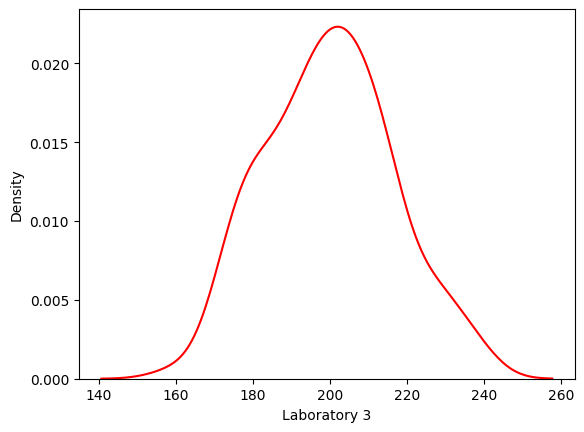

In [ ]:
sns.distplot(df2['Laboratory 3'], kde=True, hist= False, color='red')

<Axes: xlabel='Laboratory 1', ylabel='Density'>

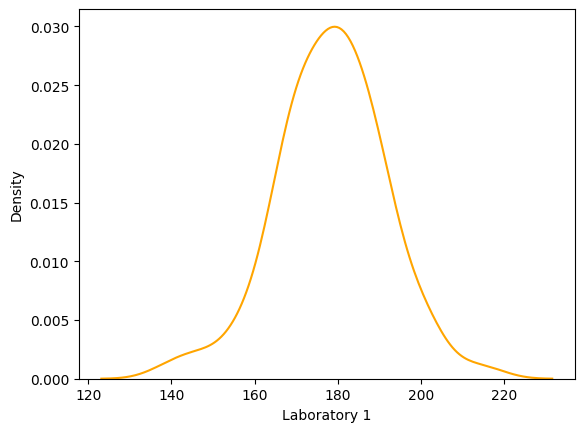

In [ ]:
sns.distplot(df2['Laboratory 1'], kde=True, hist= False, color='orange')

plotting qq  plot checking the dataset is normally distributed or not.

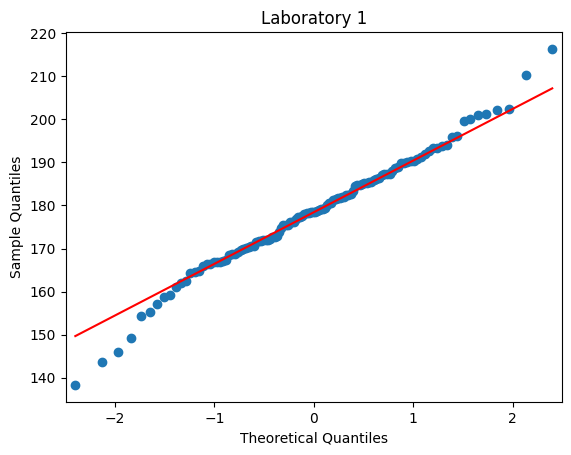

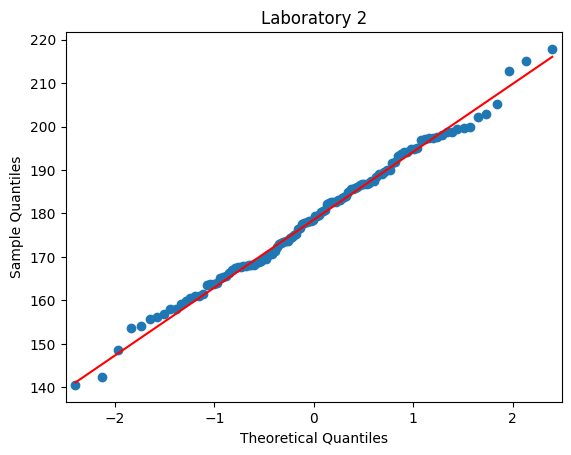

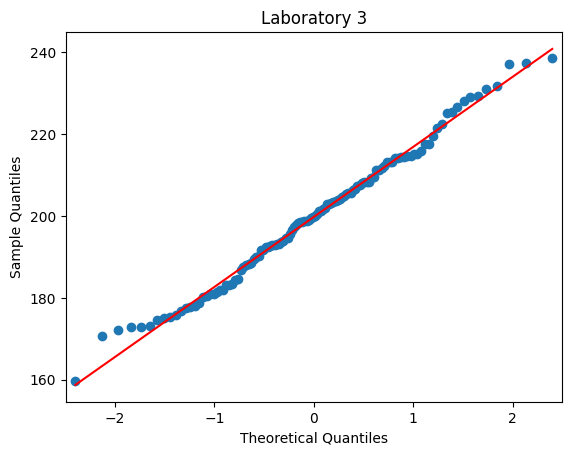

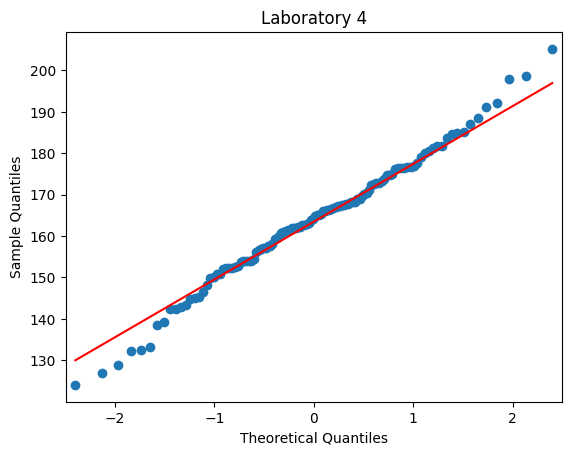

In [ ]:
sm.qqplot(df2['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(df2['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(df2['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(df2['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

Hypothesis using t-statistic

In [ ]:
H_test, p_value= stats.f_oneway(df2.iloc[:,0],df2.iloc[:,1],df2.iloc[:,2],df2.iloc[:,3])
print('p_value=',p_value)

p_value= 2.1156708949992414e-57


In [ ]:
x=0.05
if p_value <= x:
  print("We accept the null hypothesis")
else:
  print("We reject the null hypothesis and accept alternative hypothesis")

We accept the null hypothesis


### Hence, We accept the null hypothesis because there is no significant difference between the samples

# Buyer Ratio hypothesis testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency


In [ ]:
df3=pd.read_csv('BuyerRatio.csv')
df3

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
table=np.array((df3.iloc[0,1:5],df3.iloc[1,1:5]))
table

array([[50, 142, 131, 70],
       [435, 1523, 1356, 750]], dtype=object)

In [ ]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

Chi-square value= 1.5959
p_value = 0.6603
alpha value = 0.05

## we accept the null hypothesis because there is no dependency between male and female buyers ratio.

# Costomer Order Form

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency


In [ ]:
df4= pd.read_csv('Costomer+OrderForm.csv')
df4

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
df4.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [ ]:
df4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


Checking value counts in data

In [ ]:
print(df4['India'].value_counts(), '\n', df4['Indonesia'].value_counts(),
      '\n',df4['Malta'].value_counts(),'\n',df4['Phillippines'].value_counts())

Error Free    280
Defective      20
Name: India, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    271
Defective      29
Name: Phillippines, dtype: int64


creating contingency table

In [ ]:
conti= [[280,267,269,271],[20,33,31,29]]
print(conti)

[[280, 267, 269, 271], [20, 33, 31, 29]]


calculate expected value for observed data

In [ ]:
stat, p, df, exp = stats.chi2_contingency(conti)
print("stats=", stat,"p_value=",  p)

stats= 3.858960685820355 p_value= 0.2771020991233135


In [ ]:
stat, p, df, exp = stats.chi2_contingency(conti)
print("Degree of freedom =", df)

Degree of freedom = 3


In [ ]:
stat, p, df, exp = stats.chi2_contingency(conti)
print(exp)

[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


defining expected values and observed values

In [ ]:
obs = np.array([280,267,269,271,20,33,31,29])
exp= np.array([271.75, 271.75, 271.75, 271.75, 28.25,  28.25,  28.25,  28.25])

compare the evidence with hypothesis t statistic

In [ ]:
t_stats, p_value = stats.chisquare(obs,exp, ddof=df)
print("t_stats=", t_stats ,"\n", "p_value=",p_value)

t_stats= 3.858960685820355 
 p_value= 0.4254298144535761


In [ ]:
alpha= 0.05
if p_value <= alpha:
  print('Reject the null hypothesis and accept the alternative')
else:
  print("accept the null hypothesis")

accept the null hypothesis


## Accept the null hypothesis